### Gradient Descent with 1 Feature

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns 
sns.set()

import warnings
warnings.filterwarnings("ignore")

pd.set_option('max_columns', 200)
pd.set_option('max_rows', 100)

In [2]:
import math

In [3]:
x_train = np.array([1.0, 2.0])
y_train = np.array([300, 500])

In [4]:
def compute_cost(x,y,w,b):
    m = x.shape[0]
    cost = 0
    
    for i in range(m):
        f_wb = w * x[i] + b
        cost = cost + (f_wb-y[i])**2
        
    total_cost = 1/(2*m) * cost 
    
    return total_cost 

In [5]:
def compute_gradient(x,y,w,b):
    m = x.shape[0]
    
    dj_dw = 0
    dj_db = 0 

    for i in range(m):
        f_wb = w * x[i] + b
        dj_dw_i = (f_wb - y[i]) * x[i]
        dj_db_i = f_wb - y[i]
        dj_db += dj_db_i 
        dj_dw += dj_dw_i
    dj_dw = dj_dw / m
    dj_db = dj_db / m
    
    return dj_dw, dj_db

In [6]:
def gradient_descent(x, y, w_in, b_in, alpha, num_iters, cost_function, gradient_function): 
    J_history = [] # Previous values of Cost function
    p_history = [] # Previous values of w and b 
    b = b_in
    w = w_in
    
    for i in range(num_iters):
        dj_dw, dj_db = gradient_function(x,y,w,b)
        b = b - alpha * dj_db
        w = w - alpha * dj_dw
    
        if i < 100000:
            J_history.append(cost_function(x,y,w,b))
            p_history.append([w,b])
        if i % math.ceil(num_iters/10) == 0:
            print(f"Iteration {i:4}: Cost {J_history[-1]:0.2e} ",
                  f"dj_dw: {dj_dw: 0.3e}, dj_db: {dj_db: 0.3e} ", 
                  f"w: {w: 0.3e}, b:{b:0.5e}")
    return w, b, J_history, p_history

In [7]:
w_init = 0
b_init = 0

iterations = 10000
tmp_alpha = 1.0e-2
w_final, b_final, J_hist, p_hist = gradient_descent(x_train, y_train, w_init, b_init, tmp_alpha, iterations, compute_cost, compute_gradient)

print(f"(w,b) found by gradient descent: ({w_final: 8.4f}, {b_final: 8.4f})")

Iteration    0: Cost 7.93e+04  dj_dw: -6.500e+02, dj_db: -4.000e+02  w:  6.500e+00, b:4.00000e+00
Iteration 1000: Cost 3.41e+00  dj_dw: -3.712e-01, dj_db:  6.007e-01  w:  1.949e+02, b:1.08228e+02
Iteration 2000: Cost 7.93e-01  dj_dw: -1.789e-01, dj_db:  2.895e-01  w:  1.975e+02, b:1.03966e+02
Iteration 3000: Cost 1.84e-01  dj_dw: -8.625e-02, dj_db:  1.396e-01  w:  1.988e+02, b:1.01912e+02
Iteration 4000: Cost 4.28e-02  dj_dw: -4.158e-02, dj_db:  6.727e-02  w:  1.994e+02, b:1.00922e+02
Iteration 5000: Cost 9.95e-03  dj_dw: -2.004e-02, dj_db:  3.243e-02  w:  1.997e+02, b:1.00444e+02
Iteration 6000: Cost 2.31e-03  dj_dw: -9.660e-03, dj_db:  1.563e-02  w:  1.999e+02, b:1.00214e+02
Iteration 7000: Cost 5.37e-04  dj_dw: -4.657e-03, dj_db:  7.535e-03  w:  1.999e+02, b:1.00103e+02
Iteration 8000: Cost 1.25e-04  dj_dw: -2.245e-03, dj_db:  3.632e-03  w:  2.000e+02, b:1.00050e+02
Iteration 9000: Cost 2.90e-05  dj_dw: -1.082e-03, dj_db:  1.751e-03  w:  2.000e+02, b:1.00024e+02
(w,b) found by gradi

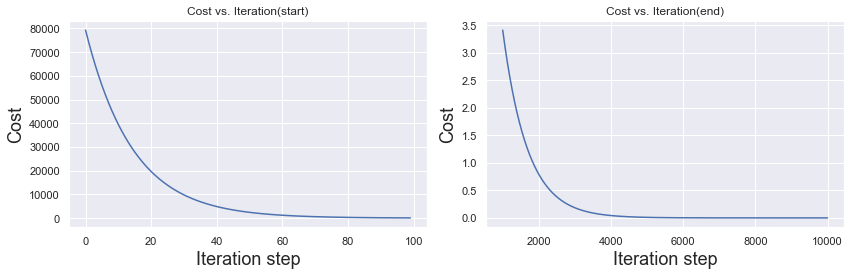

In [8]:
fig , (ax1,ax2) = plt.subplots(1,2,figsize=(12,4))
ax1.plot(J_hist[:100])
ax2.plot(1000 + np.arange(len(J_hist[1000:])), J_hist[1000:])
ax1.set_title("Cost vs. Iteration(start)")
ax2.set_title("Cost vs. Iteration(end)")
ax1.set_xlabel("Iteration step", fontsize=18)
ax2.set_xlabel("Iteration step", fontsize=18)
ax1.set_ylabel("Cost", fontsize=18)
ax2.set_ylabel("Cost", fontsize=18)
plt.tight_layout()

In [9]:
print(f"1000 sqft house: {w_final*1 + b_final:0.1f} thousand dollars\n2000 sqft house: {w_final*2 + b_final:0.1f} thousand dollars")

1000 sqft house: 300.0 thousand dollars
2000 sqft house: 500.0 thousand dollars


### Gradient Descent with Multiple Features

In [10]:
import copy, math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns 
sns.set()

In [11]:
X_train = np.array([[2104,5,1,45],[1416,3,2,40],[852,2,1,35]])
y_train = np.array([460,232,178])

In [12]:
b_init = 785.1811367994083
w_init = np.array([ 0.39133535, 18.75376741, -53.36032453, -26.42131618])

In [13]:
def compute_cost(X,y,w,b):
    cost = 0
    row_num = X.shape[0]
    
    for i in range(row_num):
        cost += 1/(2*row_num) * (np.dot(w,X[i]) + b - y[i])**2
    return cost

In [14]:
cost = compute_cost(X_train, y_train, w_init, b_init)
cost

1.5578904045996674e-12

In [15]:
def compute_gradient(X,y,w,b):
    row_num, feature_num = X.shape
    dj_dw = np.zeros((feature_num,))
    dj_db = 0
    
    for i in range(row_num):
        f_wb = np.dot(X[i],w) + b
        for j in range(feature_num):
            dj_dw[j] += 1/row_num * (f_wb - y[i])*X[i,j]
        dj_db += 1/row_num * f_wb - y[i]

    
    return dj_dw, dj_db

#### Some Notes:
##### Compute gradient for each parameter (w,b) for the first time in iteration
- We have n rows and m features in the matrix X_train
- Start with **initial w and b**. ***w is the (mx1) vector*** coressponding to m features
- To compute the ***gradient dj_dw of each feature***:
1. Choose row: 1st row for example
2. Compute f_wb for that row: 
```python 
f_wb = np.dot(w_init,X_train[i]) + b
```
3. Calculate the error for that row:
```python
error = f_wb - y[i]
```
4. Calculate the gradient for each of the weight (corressponding to each feature)
```python
dj_dw[j] += 1/m * error*X[i,j]
```
- To compute the ***gradient dj_db (for the first time in iteration series)***
```python
dj_db += error
```


In [16]:
tmp_dj_dw, tmp_dj_db = compute_gradient(X_train,y_train,w_init,b_init)
print(f"dj_dw at initial w.b: {tmp_dj_dw}\ndj_db at initial w,b: {tmp_dj_db}")


dj_dw at initial w.b: [-2.72623574e-03 -6.27197255e-06 -2.21745574e-06 -6.92403377e-05]
dj_db at initial w,b: -580.0000016739251


In [17]:
def gradient_descent(X,y,w_in,b_in, cost_function, gradient_function, alpha, num_iters):
    J_history = []
    w = w_in
    b = b_in 
    
    for i in range(num_iters):
        dj_dw, dj_db = gradient_function(X,y,w,b)
    
        w = w - alpha*dj_dw
        b = b - alpha*dj_db
    
        if i < 100000:
            J_history.append(cost_function(X,y,w,b))
            
        if i% math.ceil(num_iters/10) == 0:
            print(f"Iteration {i:4d}: Cost {J_history[-1]:8.2f} ")
    return w,b,J_history


In [18]:
initial_w = np.zeros_like(w_init) 
initial_b = 0

iterations = 1000
alpha = 5.0e-7

w_final, b_final, J_hist = gradient_descent(X_train,y_train,initial_w, initial_b,compute_cost,compute_gradient,alpha,iterations)
print(f"b_final: {b_final}\nw_final: {w_final}")

Iteration    0: Cost  2529.48 
Iteration  100: Cost   696.13 
Iteration  200: Cost   695.20 
Iteration  300: Cost   694.27 
Iteration  400: Cost   693.36 
Iteration  500: Cost   692.45 
Iteration  600: Cost   691.54 
Iteration  700: Cost   690.65 
Iteration  800: Cost   689.76 
Iteration  900: Cost   688.88 
b_final: 0.2877566511360619
w_final: [ 0.20379445  0.00375025 -0.01125989 -0.06608828]


In [19]:
from sklearn.linear_model import LinearRegression

In [20]:
reg = LinearRegression()

reg.fit(X_train,y_train)

print(reg.coef_)
print(f"\n{reg.intercept_}")

[  0.39133535  18.75376741 -53.36032453 -26.42131618]

785.1811367994087


Text(0, 0.5, 'Cost')

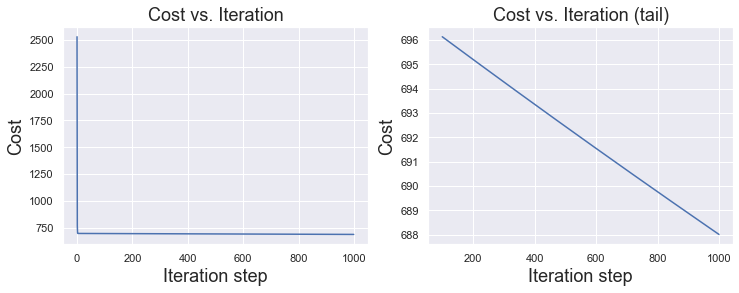

In [21]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(12,4))

ax1.plot(np.arange(iterations), J_hist) 
ax2.plot(100+np.arange(len(J_hist[100:])), J_hist[100:])
ax1.set_title("Cost vs. Iteration", fontsize=18)
ax2.set_title("Cost vs. Iteration (tail)", fontsize=18)
ax1.set_xlabel("Iteration step", fontsize=18)
ax2.set_xlabel("Iteration step", fontsize=18)
ax1.set_ylabel("Cost", fontsize=18)
ax2.set_ylabel("Cost", fontsize=18)